<AxesSubplot:>

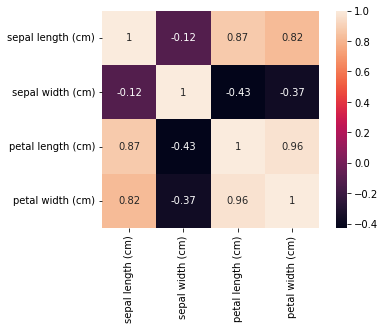

In [15]:
from sklearn import datasets
import pandas as pd
import seaborn as sns

iris = datasets.load_iris()
datasets = pd.DataFrame(iris.data,columns=iris.feature_names)
corr = datasets.corr()
# annotは相関値を表示する
sns.heatmap(corr,square=True,annot=True)

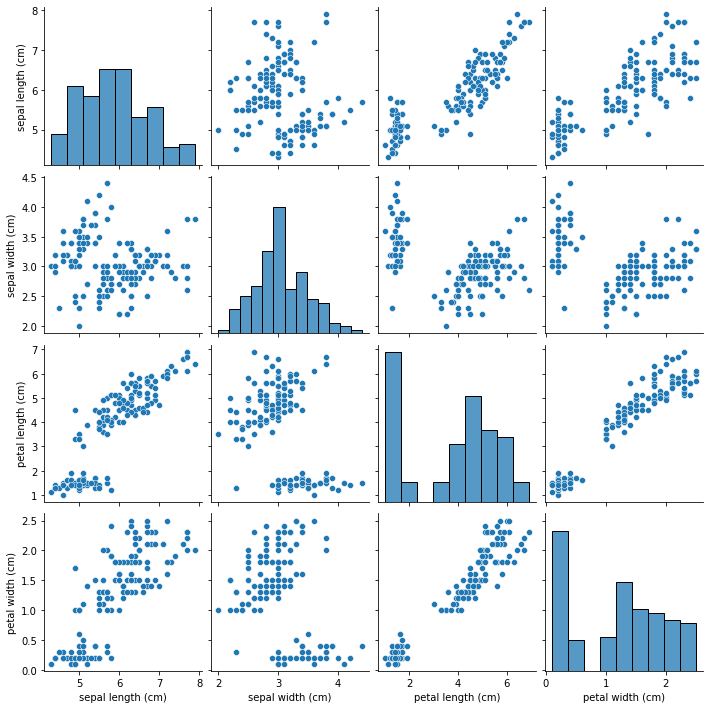

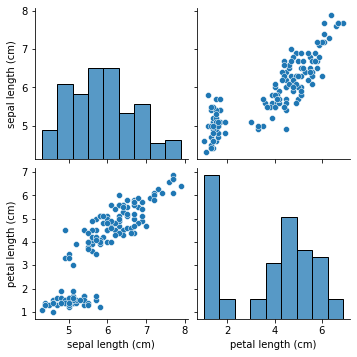

In [36]:
sns.pairplot(datasets)
sns.pairplot(datasets[['sepal length (cm)','petal length (cm)']])

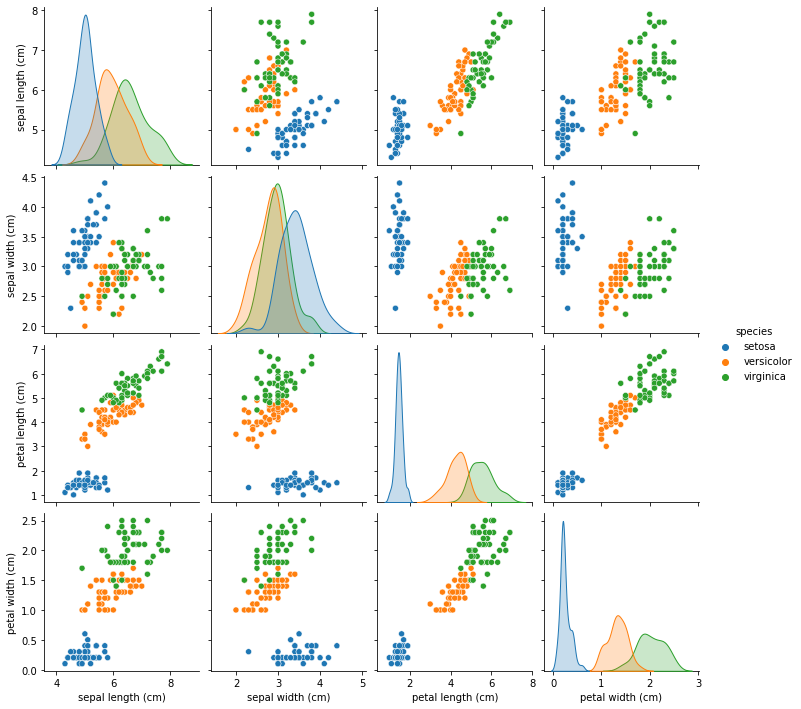

In [39]:
datasets['species'] = iris.target
datasets.loc[datasets['species'] == 0, 'species'] = "setosa"
datasets.loc[datasets['species'] == 1, 'species'] = "versicolor"
datasets.loc[datasets['species'] == 2, 'species'] = "virginica"
sns.pairplot(datasets,hue='species')

[ 15  23  41  44  50  52  54  55  56  57  60  63  68  70  72  73  76  77
  83  84  86  87  90  98 101 106 110 113 118 119 121 123 126 127 131 133
 138 141 142 145 146 147 149]


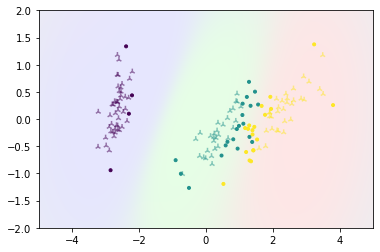

In [23]:
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as ListedColormap
import numpy as np

iris = datasets.load_iris()
datasets = pd.DataFrame(iris.data,columns=iris.feature_names)

# 主成分分析で多次元のデータを二次元に圧縮する
pcamodel = PCA(n_components=2)
pcamodel.fit(datasets)

pca_cor = pcamodel.transform(datasets)
pca_cols = ["PC{}".format(x + 1) for x in range(len(datasets.columns))]
#pca_df = pd.DataFrame(pca_cor,columns=pca_cols)

clf = SVC(gamma="scale",probability=True)
clf.fit(pca_cor,iris.target)

#データセットの中からサポートベクターに対応する箇所を判断する配列を用意する
support = np.zeros(pca_cor.shape[0], dtype="bool")
support[clf.support_] = True


ax = plt.subplot()
# ターゲットのラベルを散布する
ax.scatter(pca_cor[~support,0], pca_cor[~support,1], marker="2",c=iris.target[~support],alpha=0.5)
ax.scatter(pca_cor[support,0], pca_cor[support,1], marker=".", c=iris.target[support])


# 確率のプロット
# モデルの出力を可視化する
XX, YY = np.meshgrid(np.arange(-5, 5, 0.025),
                         np.arange(-2, 2, 0.025))

Z = clf.predict_proba(np.stack([XX.ravel(), YY.ravel()], axis=1))
ZZ = np.flip(Z.reshape(XX.shape + (3, )), axis=1)
ax.imshow(ZZ, alpha=0.1,
              aspect="auto", extent=(-5, 5, -2, 2))

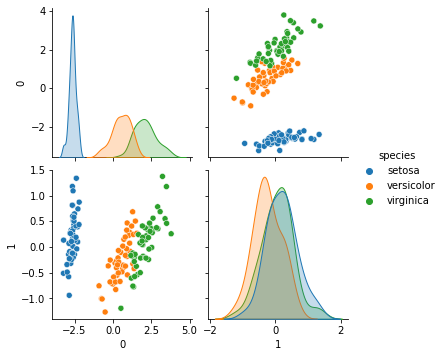

In [32]:
import seaborn as sns

datasets = pd.DataFrame(pca_cor)
datasets['species'] = iris.target
datasets.loc[datasets['species'] == 0, 'species'] = "setosa"
datasets.loc[datasets['species'] == 1, 'species'] = "versicolor"
datasets.loc[datasets['species'] == 2, 'species'] = "virginica"
sns.pairplot(datasets,hue='species')

In [ ]:

""